In [2]:
import pandas as pd
import numpy as np

In [32]:
trade = pd.read_csv('data/trade.csv')

In [33]:
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


In [34]:
len(trade) - trade.count()

기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [35]:
trade = trade.drop('기타사항', axis=1)

In [38]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [37]:
trade.dropna(how='all', subset=['국가명'])

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0
195,2020년 05월,일본,166568.0,1798128.0,133763.0,3102734.0,-1304606.0
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN


In [39]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)

In [40]:
trade

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [41]:
trade[(trade['국가명']=='미국')&((trade['기간']=='2020년 03월')|(trade['기간']=='2020년 05월'))]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [42]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2

In [44]:
trade.loc[191, '무역수지'] = trade.loc[188, '수출금액'] - trade.loc[194, '수출금액']

In [45]:
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,2692112.0


In [57]:
trade[trade.duplicated(keep=False)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [50]:
trade[trade.duplicated(keep='first')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [55]:
trade.drop_duplicates(keep='last').iloc[184:190]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
184,2020년 02월,미국,88413.0,5932556.0,1356388.0,5435320.0,497236.0
185,2020년 02월,일본,121193.0,2265303.0,136473.0,3771732.0,-1506429.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
189,2020년 03월,일본,150602.0,2486175.0,153670.0,4394441.0,-1908266.0
190,2020년 04월,중국,194716.0,10164071.0,365746.0,9619835.0,544236.0


In [60]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})

In [61]:
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [67]:
df.drop_duplicates(['id'], keep='last')

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [69]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [70]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
107,2017년 12월,일본,72429.0,2449867.0,149326.0,4947939.0,-2498072.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0


In [71]:
# Q. 무역수지 값을 기준으로 z=2일 때 이상치 데이터를 출력해보세요.
trade.loc[outlier(trade, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [72]:
# Q. 무역수지 값을 기준으로 z=3일 때 이상치 데이터를 출력해보세요.
trade.loc[outlier(trade, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [73]:
# Q. not_outlier() 함수를 구현하세요.
def not_outlier(df, col, z):
    return df[~(abs(df[col] - np.mean(df[col]))/np.std(df[col])>z)].index

👽 It's okay, no biggie.


In [74]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,2692112.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [75]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

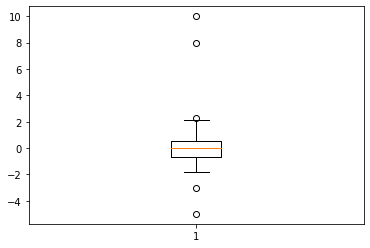

In [76]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

In [77]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
IQR

1.1644925829790964

In [78]:
data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [101]:
# Q. 사분위 범위수를 이용해서 이상치를 찾는 outlier2() 함수를 구현해보세요.
def outlier2(df, col):
    Q3, Q1 = np.percentile(df[col], [75 ,25])
    IQR = Q3 - Q1
    return df[(Q1-1.5*IQR > df[col]) | (Q3+1.5*IQR < df[col])]

outlier2(trade, '무역수지')

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [103]:
Q3, Q1 = np.percentile(trade['무역수지'], [75 ,25])
IQR = Q3 - Q1

In [104]:
IQR

4359949.0

In [105]:
Q1-(1.5*IQR)

-8157562.0

In [106]:
Q3+(1.5*IQR)

9282234.0

In [109]:
trade['무역수지'].sort_values().head(10)

80    -2761657.00
116   -2622691.00
101   -2570584.00
107   -2498072.00
83    -2458524.00
119   -2456833.00
95    -2428621.00
77    -2423603.00
89    -2422395.00
98    -2409535.00
Name: 무역수지, dtype: float64

In [110]:
trade['무역수지'].sort_values(ascending=False).head(10)

132   6700639.00
129   5875989.00
105   5248232.00
114   5164151.00
123   5101223.00
96    5097269.00
126   4851955.00
135   4803932.00
102   4747569.00
99    4648071.00
Name: 무역수지, dtype: float64

In [112]:
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']

In [113]:
trade_standardization = (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.02,1.39,-0.16,1.27,1.25
1,-0.69,-0.26,0.41,-0.97,0.40
2,-0.85,-1.10,-1.00,-0.87,-1.10
3,-0.42,0.85,-0.58,0.69,0.83
4,-0.77,-0.39,0.15,-1.28,0.43


In [114]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
trade_minmax = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade_minmax.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,0.14,0.79,0.20,0.70,0.71
1,0.04,0.30,0.33,0.09,0.50
2,0.01,0.04,0.00,0.11,0.13
3,0.08,0.63,0.10,0.54,0.60
4,0.02,0.25,0.27,0.00,0.51


In [116]:
one_hot = pd.get_dummies(trade['국가명'])
pd.concat([trade, one_hot], axis=1)

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,116932.00,12083947.00,334522.00,8143271.00,3940676.00,0,0,1
1,2015년 01월,미국,65888.00,5561545.00,509564.00,3625062.00,1936484.00,1,0,0
2,2015년 01월,일본,54017.00,2251307.00,82480.00,3827247.00,-1575940.00,0,1,0
3,2015년 02월,중국,86228.00,9927642.00,209100.00,6980874.00,2946768.00,0,0,1
4,2015년 02월,미국,60225.00,5021264.00,428678.00,2998216.00,2023048.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.00,5946782.00,1141118.00,5038739.00,2692112.00,1,0,0
192,2020년 04월,일본,134118.00,1989323.00,141207.00,3989562.00,-2000239.00,0,1,0
193,2020년 05월,중국,185320.00,10746069.00,349007.00,8989920.00,1756149.00,0,0,1
194,2020년 05월,미국,126598.00,4600726.00,1157163.00,4286873.00,313853.00,1,0,0
